In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
df = pd.read_csv("C:/Users/ken19189/Desktop/Personal Development/DSC/Phase 3 Project 2025/geodata_clean.csv")

In [8]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geometry,x,y
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,POINT (34.93809275 -9.856321769999999),34.938093,-9.856322
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,POINT (34.6987661 -2.14746569),34.698766,-2.147466
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,POINT (37.46066446 -3.82132853),37.460664,-3.821329
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,POINT (38.48616088 -11.15529772),38.486161,-11.155298
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,POINT (31.13084671 -1.82535885),31.130847,-1.825359


# Handling Outliers

([<matplotlib.axis.XTick at 0x1ca4b3f7310>,
 [Text(0, 0, 'amount_tsh'),
  Text(1, 0, 'gps_height'),
  Text(2, 0, 'population'),
  Text(3, 0, 'construction_year')])

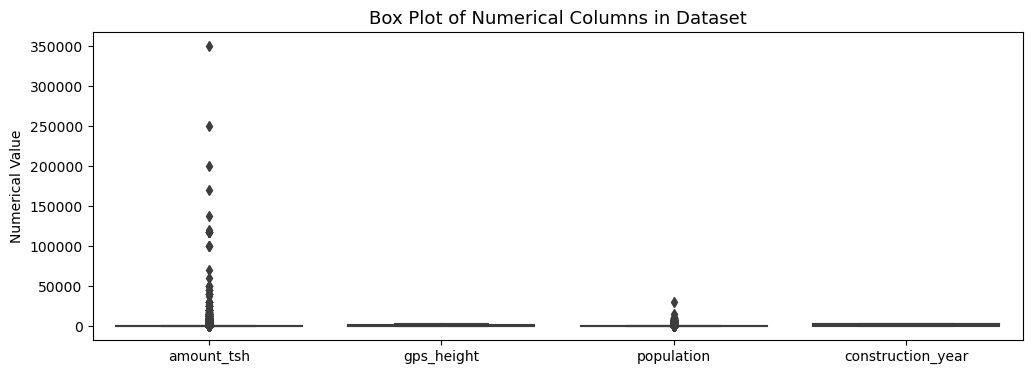

In [9]:
numerical_cols = ['amount_tsh', 'gps_height', 'population', 'construction_year']
plt.figure(figsize=(12, 4))
sns.boxplot(data=[df[col] for col in numerical_cols])
plt.title("Box Plot of Numerical Columns in Dataset", fontsize=13)
plt.ylabel("Numerical Value")
plt.xticks(range(0,4), numerical_cols)

In [10]:
df["status_group"].value_counts()

status_group
functional                 31389
non functional             22268
functional needs repair     3931
Name: count, dtype: int64

Text(0, 0.5, 'Status_group')

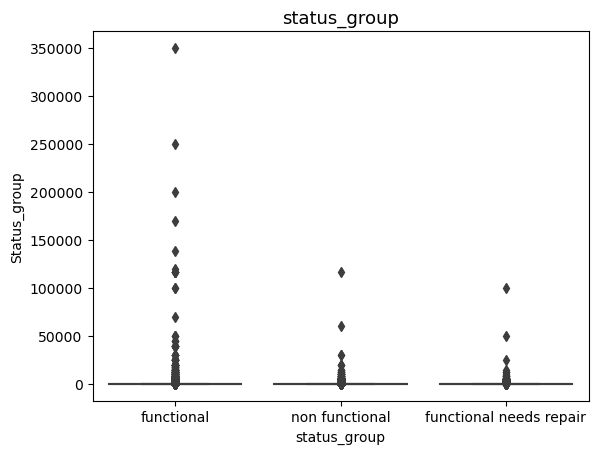

In [11]:
sns.boxplot(y='amount_tsh', x="status_group", data=df)
plt.title("status_group", fontsize=13)
plt.ylabel("amount -TSH ")
plt.ylabel("Status_group")

#Findings
Based on the provided figures, it is advisable not to remove outliers in the amount_tsh column as they likely represent real variations in water availability across different wells. These outliers are present in all status_group categories (functional, non-functional, and functional needs repair), suggesting they carry significant insights into the conditions and performance of the wells. Removing them could result in a loss of valuable information and an incomplete understanding of the dataset. Instead, transformations such as log scaling can mitigate the impact of outliers while preserving the integrity and richness of the data, ensuring robust and comprehensive analysis.

# Checking  for normal distribution in continuous columns

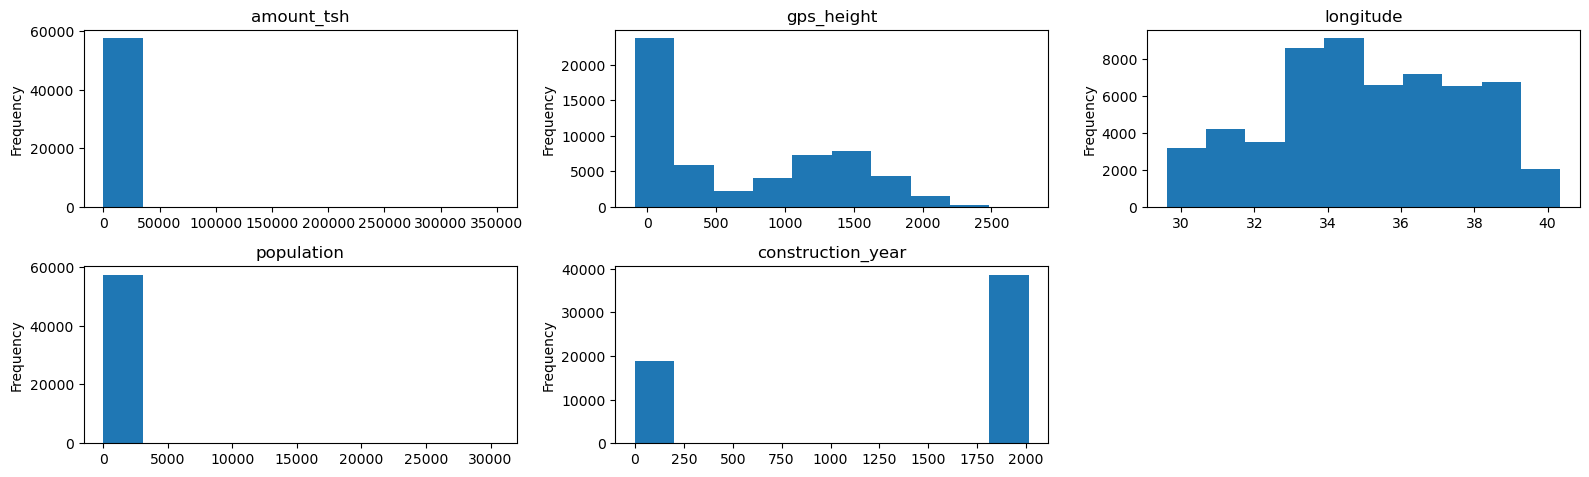

In [12]:
# Histogram of continuous variables
continuous = ['amount_tsh','gps_height','longitude', 'population','construction_year']
fig = plt.figure(figsize=(16, 7))
for i, col in enumerate(continuous):
    ax = plt.subplot(3, 3, i+1)
    df[col].plot(kind='hist', ax=ax, title=col)
plt.tight_layout()

#Findings
The histograms for the five continuous variables—amount_tsh, gps_height, longitude, population, and construction_year—illustrate their frequency distributions to assess normality. The amount_tsh variable shows most values clustered at zero. The gps_height variable is right-skewed with a significant number of values at zero. The longitude variable has a fairly uniform distribution without clear normality. The population variable is highly right-skewed with most values concentrated at zero. The construction_year variable displays a right-skewed distribution with a higher frequency of more recent years. These visualizations indicate that none of the variables follow a normal distribution.

# Label encoding and onehot encoding

In [13]:
label_mapping = {False: 0, True: 1}
df["public_meeting"] = df["public_meeting"].map(label_mapping)
df["permit"] = df["permit"].map(label_mapping)

In [14]:
label_mapping_s = {"non functional": 0, "functional needs repair": 1, "functional": 2}
df["status_group"] = df["status_group"].replace(label_mapping_s)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57588 entries, 0 to 57587
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   funder                 53964 non-null  object 
 3   gps_height             57588 non-null  int64  
 4   installer              53952 non-null  object 
 5   longitude              57588 non-null  float64
 6   latitude               57588 non-null  float64
 7   wpt_name               57586 non-null  object 
 8   num_private            57588 non-null  int64  
 9   basin                  57588 non-null  object 
 10  subvillage             57217 non-null  object 
 11  region                 57588 non-null  object 
 12  region_code            57588 non-null  int64  
 13  district_code          57588 non-null  int64  
 14  lga                    57588 non-null  object 
 15  wa

In [16]:
df.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geometry,x,y
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2,POINT (34.93809275 -9.856321769999999),34.938093,-9.856322
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2,POINT (34.6987661 -2.14746569),34.698766,-2.147466
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2,POINT (37.46066446 -3.82132853),37.460664,-3.821329
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,POINT (38.48616088 -11.15529772),38.486161,-11.155298
4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2,POINT (31.13084671 -1.82535885),31.130847,-1.825359


In [17]:
df.permit.value_counts()

permit
1.0    38100
0.0    16432
Name: count, dtype: int64

In [18]:
df.status_group.value_counts()

status_group
2    31389
0    22268
1     3931
Name: count, dtype: int64

In [19]:
df.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group', 'geometry', 'x', 'y'],
      dtype='object')

In [20]:
df.permit.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: permit, dtype: float64

In [23]:
df=df.drop(["id"], axis=1)


In [24]:
df.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,geometry,x,y
0,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2,POINT (34.93809275 -9.856321769999999),34.938093,-9.856322
1,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2,POINT (34.6987661 -2.14746569),34.698766,-2.147466
2,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2,POINT (37.46066446 -3.82132853),37.460664,-3.821329
3,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,POINT (38.48616088 -11.15529772),38.486161,-11.155298
4,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2,POINT (31.13084671 -1.82535885),31.130847,-1.825359


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57588 entries, 0 to 57587
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             57588 non-null  float64
 1   funder                 53964 non-null  object 
 2   gps_height             57588 non-null  int64  
 3   installer              53952 non-null  object 
 4   longitude              57588 non-null  float64
 5   latitude               57588 non-null  float64
 6   wpt_name               57586 non-null  object 
 7   num_private            57588 non-null  int64  
 8   basin                  57588 non-null  object 
 9   subvillage             57217 non-null  object 
 10  region                 57588 non-null  object 
 11  region_code            57588 non-null  int64  
 12  district_code          57588 non-null  int64  
 13  lga                    57588 non-null  object 
 14  ward                   57588 non-null  object 
 15  po

In [26]:
df.payment_type.value_counts()

payment_type
never pay     24380
per bucket     8953
monthly        8229
unknown        7654
on failure     3843
annually       3626
other           903
Name: count, dtype: int64

In [27]:
columns_encode=df[["installer", "basin", "region", "scheme_management", "management_group", 
         "extraction_type_class", "payment_type", 'water_quality',"quantity_group", 
         "source_class", "waterpoint_type_group"]]

In [28]:
columns_encode.head()

,installer,basin,region,scheme_management,management_group,extraction_type_class,payment_type,water_quality,quantity_group,source_class,waterpoint_type_group
0,Roman,Lake Nyasa,Iringa,VWC,user-group,gravity,annually,soft,enough,groundwater,communal standpipe
1,GRUMETI,Lake Victoria,Mara,Other,user-group,gravity,never pay,soft,insufficient,surface,communal standpipe
2,World vision,Pangani,Manyara,VWC,user-group,gravity,per bucket,soft,enough,surface,communal standpipe
3,UNICEF,Ruvuma / Southern Coast,Mtwara,VWC,user-group,submersible,never pay,soft,dry,groundwater,communal standpipe
4,Artisan,Lake Victoria,Kagera,NaN,other,gravity,never pay,soft,seasonal,surface,communal standpipe


In [29]:
df_copy=df.copy

In [30]:
columns_to_encode = ["installer", "basin", "region", "scheme_management", 
                     "management_group", "extraction_type_class", "payment_type", 
                     'water_quality', "quantity_group", "source_class", 
                     "waterpoint_type_group"]

# Create dummy variables for all specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True, dtype=int)

In [31]:
df_store=df_encoded.copy()
df_encoded.head()

,amount_tsh,funder,gps_height,longitude,latitude,wpt_name,num_private,subvillage,region_code,district_code,...,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,6000.0,Roman,1390,34.938093,-9.856322,none,0,Mnyusi B,11,5,...,0,0,0,0,0,1,0,0,0,0
1,0.0,Grumeti,1399,34.698766,-2.147466,Zahanati,0,Nyamara,20,2,...,1,0,0,1,0,1,0,0,0,0
2,25.0,Lottery Club,686,37.460664,-3.821329,Kwa Mahundi,0,Majengo,21,4,...,0,0,0,1,0,1,0,0,0,0
3,0.0,Unicef,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Mahakamani,90,63,...,0,0,0,0,0,1,0,0,0,0
4,0.0,Action In A,0,31.130847,-1.825359,Shuleni,0,Kyanyamisa,18,1,...,0,1,0,1,0,1,0,0,0,0


# Standard Scaler

In [32]:
scaled_columns=["amount_tsh", "gps_height", "population"] 

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns
df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

In [33]:
df_encoded.head()

,amount_tsh,funder,gps_height,longitude,latitude,wpt_name,num_private,subvillage,region_code,district_code,...,quantity_group_insufficient,quantity_group_seasonal,quantity_group_unknown,source_class_surface,source_class_unknown,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,1.863574,Roman,1.010261,34.938093,-9.856322,none,0,Mnyusi B,11,5,...,0,0,0,0,0,1,0,0,0,0
1,-0.107643,Grumeti,1.023238,34.698766,-2.147466,Zahanati,0,Nyamara,20,2,...,1,0,0,1,0,1,0,0,0,0
2,-0.099430,Lottery Club,-0.004794,37.460664,-3.821329,Kwa Mahundi,0,Majengo,21,4,...,0,0,0,1,0,1,0,0,0,0
3,-0.107643,Unicef,-0.614693,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Mahakamani,90,63,...,0,0,0,0,0,1,0,0,0,0
4,-0.107643,Action In A,-0.993897,31.130847,-1.825359,Shuleni,0,Kyanyamisa,18,1,...,0,1,0,1,0,1,0,0,0,0
